# Часть I: О теореме Байеса

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

  Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.



Пусть событие $А$ - человек является убийцей, а событие $В$ - у человека редкая группа крови, найденная на месте убийства. 
Из условия известно, что вероятность $P(B) = 0,01$. 
Прокурор оценил именно эту вероятность, а должен был оценить условную вероятность $P(B|\bar A)$ того, что у человека редкая группа крови, при условии что он не виновен. 

$P(B|\bar A) = \frac{P(\bar A|B)P(B)}{P(\bar A)} = \frac{P(\bar A|B)P(B)}{P(\bar A|B)P(B) + P(\bar A|\bar B)P(\bar B)} = \frac{P(\bar A|B)P(B)}{P(\bar A|B)P(B) + P(\bar B)} \ne P(B)$

В итоге прокурор оценил вероятность того, что человек не имеет редкую группу крочи, при условии, что он не виновен. А должен был оченить вероятность виновности, при условии наличия у человека редкой группы крови, а именно $P(A|B)$.

2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Адвокат оценил совместную вероятность того, что человек убийца и у него редкая группа крови:
$P(A, B) = \frac{1}{10000} = P(A|B)P(B)$. А должен был оценить условную вероятность $P(A|B)$.

3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

  Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

  Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.linear_model import Ridge

In [2]:
x = np.linspace(0, 0.05, 20)
illness_after_positive = lambda fn, fp: (1 - fn) / (1 - fn + 99 * fp)
illness_after_negative = lambda fn, fp: fn / (fn + 99 * (1 - fp))

Изначальная вероятность болезни после положительного теста:  0.16101694915254236
Изначальная вероятность болезни после отрицательного теста:  0.0005313496280552604


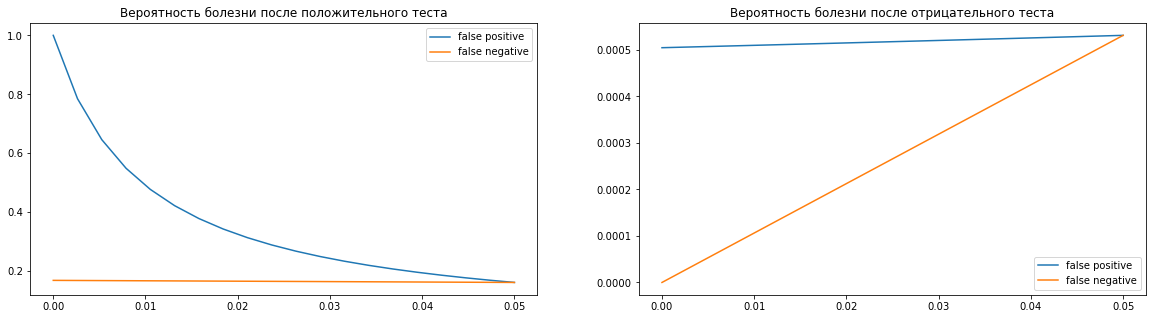

In [3]:
print("Изначальная вероятность болезни после положительного теста: ", illness_after_positive(0.05, 0.05))
print("Изначальная вероятность болезни после отрицательного теста: ", illness_after_negative(0.05, 0.05))

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.plot(x, illness_after_positive(0.05, x), label="false positive")
plt.plot(x, illness_after_positive(x, 0.05), label="false negative")
plt.title("Вероятность болезни после положительного теста")
plt.legend()

plt.subplot(122)
plt.plot(x, illness_after_negative(0.05, x), label="false positive")
plt.plot(x, illness_after_negative(x, 0.05), label="false negative")
plt.title("Вероятность болезни после отрицательного теста")
plt.legend()
plt.show()

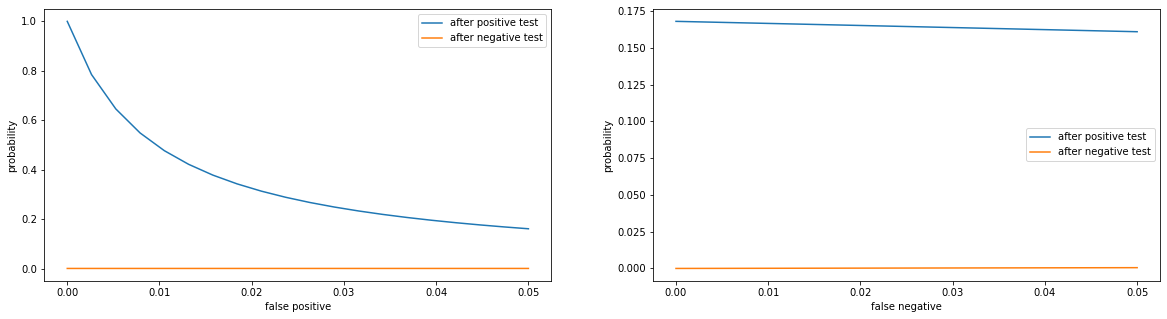

In [4]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.plot(x, illness_after_positive(0.05, x), label="after positive test")
plt.plot(x, illness_after_negative(0.05, x), label="after negative test")
plt.ylabel("probability")
plt.xlabel("false positive")
plt.legend()

plt.subplot(122)
plt.plot(x, illness_after_positive(x, 0.05), label="after positive test")
plt.plot(x, illness_after_negative(x, 0.05), label="after negative test")
plt.xlabel("false negative")
plt.ylabel("probability")
plt.legend()
plt.show()

В идеале нам бы хотелось, чтобы вероятность болезни после положительного теста была близка к 1, а после отрицательного - близка к 0. Так как изначально вероятность после отрицательного теста достаточно мала (0.05%) и при уменьшении false negative она слабо меняется, я бы советовала увеличить вероятность болезни после положительного теста, так как изначально она составляет всего 16%. Т.е. лучше сосредоточится на уменьшении числа false positive.

# Часть II: О линейной регрессии

In [5]:
data = pd.read_csv("owid-covid-data.csv")

In [6]:
data = data[data["iso_code"] == "RUS"]

In [7]:
data = data[data["date"] >= "2020-03-03"]

In [8]:
data["new_cases"] = data["new_cases"].apply(lambda x: 1 if x <= 0 else x)

In [9]:
train_data = data[:50]
test_data = data[50:]

Графики целевых переменных

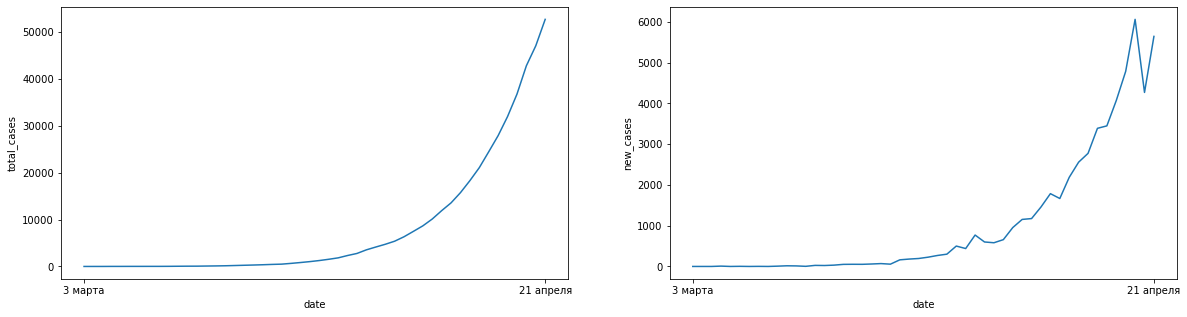

In [10]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.plot(train_data["date"], train_data["total_cases"])
plt.xticks(["2020-03-03", "2020-04-21"], ["3 марта", "21 апреля"])
plt.xlabel("date")
plt.ylabel("total_cases")

plt.subplot(122)
plt.plot(train_data["date"], train_data["new_cases"])
plt.xticks(["2020-03-03", "2020-04-21"], ["3 марта", "21 апреля"])
plt.xlabel("date")
plt.ylabel("new_cases")
plt.show()

Используя линейную регрессию, обучим модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.
$$y \sim exp(w^Tx)$$
$$\ln(y) \sim w^Tx$$

In [11]:
day_number = np.arange(1, len(train_data["date"]) + 1)
total_cases = train_data["total_cases"].values

In [12]:
total_cases_log = np.log(total_cases)

In [13]:
lambda_ = 0.1
regression_1 = Ridge(lambda_)

In [14]:
regression_1.fit(day_number.reshape(-1, 1), total_cases_log)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
w_1 = regression_1.coef_

In [16]:
w_1 = np.append(w_1, regression_1.intercept_)

In [17]:
w_1

array([0.19828901, 1.6224948 ])

Найдем апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оценим, исходя из полученной максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

Дисперсия шума: $\sigma^2 = \frac{1}{N} \sum_{n}^N{(\ln(y_n) - w^Tx_n)^2}$

In [18]:
preds = regression_1.predict(day_number.reshape(-1, 1))

In [19]:
sigma_1 = ((total_cases_log - preds) ** 2).mean()

In [20]:
sigma_1

0.1218304622991302

Пусть $p(w) \sim N(0, \alpha I)$. Тогда $\lambda = \frac{\sigma^2}{\alpha}$, где $\lambda$ - коэффициент регуляризации линейной регресии.

In [21]:
alpha_1 = sigma_1 * lambda_

Апостериорное распределение параметров модели: 

$$ p(w | D) = N(w | \mu, \Sigma),$$
$$\Sigma^{-1} = \frac{1}{\alpha}I + \frac{1}{\sigma^2}X^TX$$
$$\mu = \frac{1}{\sigma^2}\Sigma X^T \ln(y)$$

In [22]:
X_1 = np.stack((day_number, np.ones(len(day_number))), axis=1)

In [23]:
cov_1 = np.linalg.inv(np.eye(2) / alpha_1 + np.matmul(X_1.T, X_1) / sigma_1)
mu_1 = np.matmul(np.matmul(cov_1, X_1.T), total_cases_log) / sigma_1

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


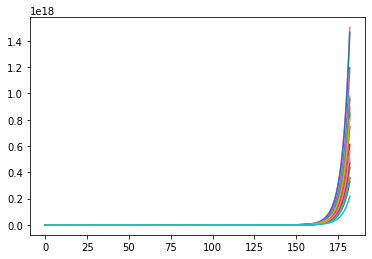

In [24]:
xs = np.arange(183)
first_may = []
first_june = []
first_september = []

for i in range(20):
    w1, w0 = np.random.multivariate_normal(mu_1, cov_1)
    first_may.append(np.exp(w1 * 59 + w0))
    first_june.append(np.exp(w1 * 90 + w0))
    first_september.append(np.exp(w1 * 182 + w0))
    plt.plot(xs, np.exp(w1 * xs + w0)) 
plt.show()

In [25]:
print("1 мая предсказывается {} +/- {} случаев короновируса".format(int(np.mean(first_may)), int(np.std(first_may))))
print("1 июня предсказывается {} +/- {} случаев короновируса".format(int(np.mean(first_june)), int(np.std(first_june))))
print("1 сентября предсказывается {} +/- {} случаев короновируса".format(int(np.mean(first_september)), int(np.std(first_september))))

1 мая предсказывается 1079755 +/- 129256 случаев короновируса
1 июня предсказывается 1019060551 +/- 218338684 случаев короновируса
1 сентября предсказывается 725852031032037632 +/- 357883775725678144 случаев короновируса


Эмпирическое предсказательное распределение: $p(\ln(y)|x, D) = N(\ln(y)|\mu^Tx, \sigma'^2)$, где $\sigma'^2 = \sigma^2 + x^T\Sigma x$

In [26]:
X_test = np.arange(51, 51 + len(test_data["date"]))

In [27]:
xs = np.stack((X_test, np.ones(len(X_test))), axis=1)

In [28]:
ys = np.exp([np.random.normal(np.matmul(mu_1.T, x), 
                              np.sqrt(sigma_1 + np.matmul(np.matmul(x.T, cov_1), x))) for x in xs])

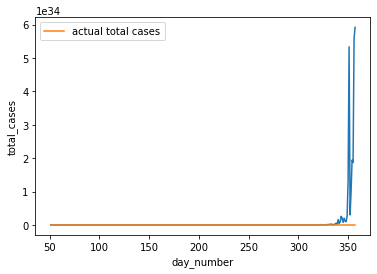

In [29]:
plt.plot(X_test, ys)
plt.xlabel("day_number")
plt.ylabel("total_cases")
plt.plot(X_test, test_data["total_cases"], label="actual total cases")
plt.legend()
plt.show()

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:

$$\Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{\frac{-t^2}{2}}dt$$

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.


Продиффиренцируем:
$g(x) = \frac{d\Phi}{dx} \sim$ exp(квадратичная функция от x)

Обучим линейную регрессию $\ln(g(x)) = ax^2 + bx + c$, где x - номер дня, а g(x) - количество new_cases

In [30]:
new_cases = train_data["new_cases"]

In [31]:
new_cases_log = np.log(new_cases)

In [32]:
X_2 = np.stack((day_number ** 2, day_number), axis=1)

In [33]:
lambda_ = 0.5
regression_2 = Ridge(lambda_)

In [34]:
regression_2.fit(X_2, new_cases_log)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
w_2 = np.append(regression_2.coef_, regression_2.intercept_)

In [36]:
w_2

array([-0.00182568,  0.27905953, -0.67188578])

Дисперсия шума:

In [37]:
preds = regression_2.predict(X_2)
sigma_2 = ((new_cases_log - preds) ** 2).mean()
sigma_2

0.23928746332970238

In [38]:
alpha_2 = sigma_2 * lambda_

In [39]:
X_2 = np.concatenate((X_2, np.ones((X_2.shape[0], 1))), axis=1)

In [40]:
cov_2 = np.linalg.inv(np.eye(3) / alpha_2 + np.matmul(X_2.T, X_2) / sigma_2)
mu_2 = np.matmul(np.matmul(cov_2, X_2.T), new_cases_log) / sigma_2

Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


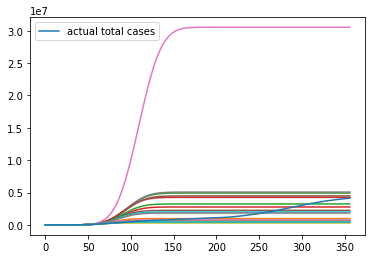

Bсходя из этих сэмплов, в России будет всего 369477+/-170269 случаев коронавируса


In [41]:
xs = np.arange(len(data))
final_value = []

for i in range(20):
    w2, w1, w0 = np.random.multivariate_normal(mu_2, cov_2)
    ys = np.cumsum(np.exp(w2 * (xs ** 2) + w1 * xs + w0))
    final_value.append(ys[-1])
    plt.plot(xs, ys)
    
plt.plot(xs, data["total_cases"], label="actual total cases")
plt.legend()
plt.show()

print("Bсходя из этих сэмплов, в России будет всего {}+/-{} случаев коронавируса".format(int(ys.mean()), 
                                                                                         int(ys.std())))

Эмпирическое предсказательное распределение: $p(\ln(g(x))|x, D) = N(ln(g(x))|\mu^Tx, \sigma'^2)$, где $\sigma'^2 = \sigma^2 + x^T\Sigma x$

In [42]:
xs = np.stack((X_test**2, X_test, np.ones(len(X_test))), axis=1)

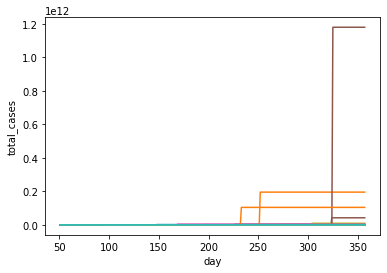

In [49]:
preds = []
for _ in range(50):
    ys = np.cumsum(np.exp([np.random.normal(np.matmul(mu_2.T, x), 
                                            np.sqrt(sigma_2 + np.matmul(np.matmul(x.T, cov_2), x))) for x in xs]))
    preds.append(ys[-1])
    plt.plot(X_test, ys)
    plt.xlabel("day")
    plt.ylabel("total_cases")
plt.show()

In [50]:
print(f"Прогноз при пессимистичном сценарии: {int(np.quantile(preds, 0.9))} случаев")
print(f"Прогноз при оптимистичном сценарии: {int(np.quantile(preds, 0.1))} случаев")

Прогноз при пессимистичном сценарии: 6131158578 случаев
Прогноз при оптимистичном сценарии: 12360243 случаев
